In [ ]:
!pip install gdown

!gdown --id 1kbYmGkMsQGVBdnDStxx3nz79WNh5JXy7 # training_set_clean_only_text.txt
!gdown --id 1XP30I7gKxhY1jOCOFlcIWDQDnZ3Qk9rZ # training_set_clean_only_tags.txt
!gdown --id 1z0Laz8jCGR-GQcMNL2_qKsGnbL4VRRCY # test_set_clean_only_text.txt
!gdown --id 1o_XRCnKlScCrZRk5suzjwzljT7YonQ2q # test_set_clean_only_tags.txt


!gdown --id 1gJL8GYTuWj5BXUUFnCy--AE4xEZlDr1u # corpora

!gdown --id 1-IeRYiTy5rujiTg97jrEzhCSpdJkoBL1 # dataset4

!gdown --id 1IezKpxY0c8OHv0nq44yrUH8pYtHnsnY- # dataset5

/content/drive/My Drive/inzynierka


In [ ]:
!pip install morfeusz2
import morfeusz2
morf = morfeusz2.Morfeusz()
import pandas as pd
import numpy as np
import re

import string
from string import ascii_lowercase
from sklearn.metrics import f1_score, confusion_matrix

from gensim.models import Word2Vec
from gensim.models import FastText
import unicodedata
!pip install emoji
import emoji
from string import punctuation

import gensim

import pickle

In [ ]:
print(gensim.__version__)

3.6.0


In [ ]:
dataset_clean = []
with open('dataset_clean4.txt', 'r') as file2:
  for i, line in enumerate(file2):
    dataset_clean.append(line.split())

In [ ]:
dataset_clean = []
with open('dataset_clean5.txt', 'r') as file2:
  for i, line in enumerate(file2):
    dataset_clean.append(line.split())

## processing - less advanced



In [ ]:
model_embeddings300_2_gpu_full = Word2Vec(sentences=dataset_clean, size=300, window=5, min_count=1, workers=4)

In [ ]:
model_embeddings300_2_gpu_full.save("word2vec1.model")

In [ ]:
model_embeddings300_2_gpu_full.wv.most_similar('morawiecki', topn=10)

[('kołodko', 0.7525454759597778),
 ('hausner', 0.7335812449455261),
 ('schetyna', 0.6356648802757263),
 ('szczurek', 0.6251892447471619),
 ('pawlak', 0.6089557409286499),
 ('balcerowicz', 0.6087574362754822),
 ('arłukowicz', 0.6066948175430298),
 ('gowin', 0.6035552024841309),
 ('kalinowski', 0.5992164015769958),
 ('miller', 0.5984028577804565)]

### embeddings 100 basline word2vec

In [ ]:
model_embeddings100_2_gpu_full = Word2Vec(sentences=dataset_clean, size=100, window=5, min_count=1, workers=4)

In [ ]:
model_embeddings100_2_gpu_full.save("word2vec2_100.model")

### embeddings 256 word2vec

In [ ]:
model_embeddings256 = Word2Vec(sentences=dataset_clean, size=256, window=5, min_count=1, workers=4)

In [ ]:
model_embeddings256.save("word2vec3_256.model")

### old data skip-gram

In [ ]:
model_embeddings128 = Word2Vec(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4, sg=1)
model_embeddings128.save("word2vec2_128_new_proc_sg_old_data.model")

### fasttext old processing

In [ ]:
model_embeddings100_fast = FastText(sentences=dataset_clean, size=100, window=5, min_count=1, workers=4,sg=1)
model_embeddings100_fast.save("word2vec_fast_100.model")

In [ ]:
model_embeddings256_fast = FastText(sentences=dataset_clean, size=256, window=5, min_count=1, workers=4,sg=1)
model_embeddings256_fast.save("word2vec_fast_256.model")

## analyse training dataset

In [ ]:
def read_file(file_name): # read given file and create list of phrases
  lines = []
  with open(file_name, encoding="UTF-8-SIG") as text:
    for line in text:
      lines.append(line[:-1])
  return lines
  
def merge_lists(list1, list2):
  merged = []
  for i in range(len(list1)):
    merged.append([list1[i], list2[i]])
  return merged
  
text = read_file('training_set_clean_only_text.txt')
labels = read_file('training_set_clean_only_tags.txt')

texts_labels = merge_lists(text, labels)

text_test = read_file('test_set_clean_only_text.txt')
labels_test = read_file('test_set_clean_only_tags.txt')

texts_labels_test = merge_lists(text_test, labels_test)

In [ ]:
print(len(texts_labels))
print(len(texts_labels_test))

10041
1000


In [ ]:
def remove_duplicates(dataset):
  dataset_clean = []
  for line in dataset:
    word_line = line[0]
    label = line[1]
    words = word_line.split()
    if words[0] == 'RT': 
      continue
    dataset_clean.append(line)
  return dataset_clean

clean_train = remove_duplicates(texts_labels)
clean_test = remove_duplicates(texts_labels_test)

In [ ]:
print(len(clean_train))
print(len(clean_test))

9387
945


In [ ]:
def check_hate(dataset):
  texts, labels = [], []
  for line in dataset:
    texts.append(line[0])
    labels.append(line[1])
  
  print(f' proportion of hate is {sum([int(i) for i in labels])/len(dataset)}') 

check_hate(clean_train)   
check_hate(clean_test)

 proportion of hate is 0.08074997336742303
 proportion of hate is 0.12804232804232804


In [ ]:
def stats_dataset(dataset):
  sent_len = np.zeros((280,))
  for i in range(1,280):
    sent_len[i] = 0
  for line in dataset:
    curr_len = len(line[0])
    sent_len[curr_len] += 1

  return sent_len
lenghts_ds = stats_dataset(clean_train)
lenghts_ds_test = stats_dataset(clean_test)
 

In [ ]:
np.where(lenghts_ds>0)

(array([  6,  18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
         31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
         83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 191,
        192, 194, 204, 206, 214]),)

In [ ]:
np.where(lenghts_ds_test>0)

(array([ 25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 166, 168, 169, 172, 175,
        178, 182]),)

In [ ]:
print(np.sum(lenghts_ds[140:]) / np.sum(lenghts_ds))
print(np.sum(lenghts_ds_test[140:]) / np.sum(lenghts_ds_test))

0.09427932246724192
0.09312169312169312


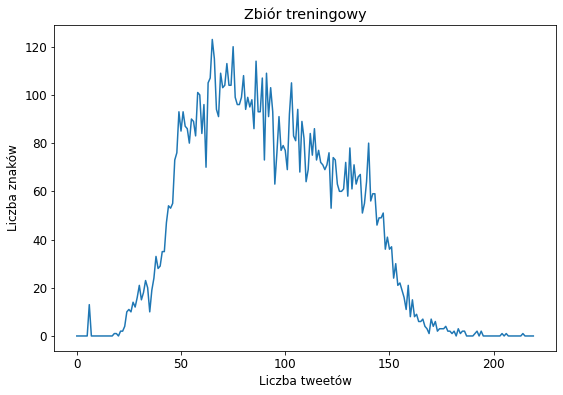

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(np.arange(220), lenghts_ds[:-60])
plt.xlabel('Liczba tweetów')
plt.ylabel('Liczba znaków')
plt.title('Zbiór treningowy')
plt.show()

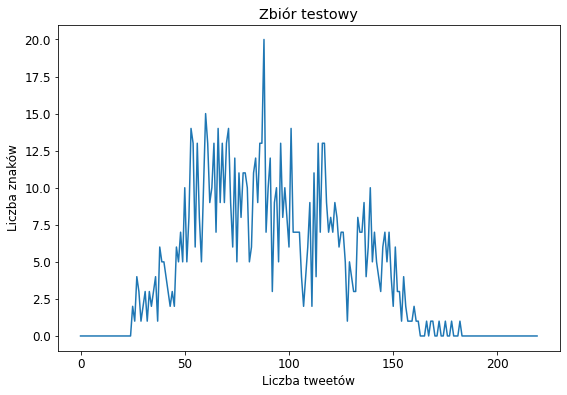

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(9, 6))

p = plt.plot(np.arange(220), lenghts_ds_test[:-60])
plt.xlabel('Liczba tweetów')
plt.ylabel('Liczba znaków')
plt.title('Zbiór testowy')

plt.show()

In [ ]:
lenghts_ds_test[:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        1.,  4.,  3.,  1.,  2.,  3.,  1.,  3.,  2.,  3.,  4.,  1.,  6.,
        5.,  5.,  4.,  3.,  2.,  3.,  2.,  6.,  5.,  7.,  5., 10.,  5.,
        8., 14., 13.,  6., 13.,  8.,  5., 10., 15., 13.,  9., 10., 13.,
        7., 14.,  9., 13.,  9., 13., 14.,  9.,  6., 12.,  5., 11.,  8.,
       11., 11., 10.,  5.,  6., 11., 12.,  9., 13., 13., 20.,  7., 10.,
       12.,  3.,  9., 10.,  5., 13.,  8., 10.,  8.,  6., 14.,  7.,  7.,
        7.,  7.,  4.,  2.,  4.,  6.,  9.,  2., 11.,  4., 13.,  7., 13.,
       13.,  9.,  7.,  8.,  7.,  9.,  8.,  6.,  7.,  7.,  5.,  1.,  5.,
        4.,  3.,  3.,  8.,  7.,  7.,  9.,  4.,  6., 10.,  5.,  7.,  5.,
        4.,  3.,  6.,  7.,  5.,  7.,  4.,  2.,  6.,  3.,  3.,  1.,  4.,
        2.,  1.,  1.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0

## add train sentences 




In [ ]:
def read_file(file_name): # read given file and create list of phrases
  lines = []
  with open(file_name, encoding="UTF-8-SIG") as text:
    for line in text:
      lines.append(line[:-1])
  return lines
  
text = read_file('training_set_clean_only_text.txt')
text_test = read_file('test_set_clean_only_text.txt')


In [ ]:
text[:10]

['Dla mnie faworytem do tytułu będzie Cracovia. Zobaczymy, czy typ się sprawdzi.',
 '@anonymized_account @anonymized_account Brawo ty Daria kibic ma być na dobre i złe',
 '@anonymized_account @anonymized_account Super, polski premier składa kwiaty na grobach kolaborantów. Ale doczekaliśmy czasów.',
 '@anonymized_account @anonymized_account Musi. Innej drogi nie mamy.',
 'Odrzut natychmiastowy, kwaśna mina, mam problem',
 'Jaki on był fajny xdd pamiętam, że spóźniłam się na jego pierwsze zajęcia i to sporo i za karę kazał mi usiąść w pierwszej ławce XD',
 '@anonymized_account No nie ma u nas szczęścia 😉',
 '@anonymized_account Dawno kogoś tak wrednego nie widziałam xd',
 '@anonymized_account @anonymized_account Zaległości były, ale ważne czy były wezwania do zapłaty z których się klub nie wywiązał.',
 '@anonymized_account @anonymized_account @anonymized_account Gdzie jest @anonymized_account . Brudziński jesteś kłamcą i marnym kutasem @anonymized_account']

In [ ]:
not_wanted_words = ['@anonymized_account']

def word_process(word, remove_accents=False, keep_punctuation=False):
  if word in not_wanted_words:
    return False

  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
  word = emoji_pattern.sub(r'', word) # no emoji

  word = word.lower()
  if not keep_punctuation:
    word = word.translate(str.maketrans('', '', string.punctuation))

  analysis = morf.analyse(word)
  for interpretation in analysis:
    word = interpretation[2][1].split(':')[0]
    break 
  word = word.lower()
  if len(word)==0:
    return False
  if remove_accents == True:
    word = unicodedata.normalize('NFKD', word)
  return word


def clean_dataset(dataset, remove_accents=False, keep_punctuation=False):
  dataset_clean = []
  for line in dataset:
    row = []
    if keep_punctuation:
      words = nltk.word_tokenize(line[0])
    else:
      words = line.split()
    if len(words)>0 and words[0] == 'RT': 
      continue
    for word in words:

      word = word_process(word, remove_accents, keep_punctuation)
      if word != False: 
        row.append(word)
    # print(row)
    dataset_clean.append(' '.join(row))
  return dataset_clean

clean_train = clean_dataset(text)


In [ ]:
for sen in clean_train:
  dataset_clean.append(sen.split())

In [ ]:
len(dataset_clean)

5009385

In [ ]:
model_embeddings100_fast_with_train = FastText(sentences=dataset_clean, size=100, window=5, min_count=1, workers=4,sg=1)
model_embeddings100_fast_with_train.save("word2vec_fast_100_with_train.model")

In [ ]:
model_embeddings128_fast_with_train = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_train.save("word2vec_fast_128_with_train.model")

In [ ]:
del model_embeddings128_fast_with_train
model_embeddings128_fast_with_train_min2 = FastText(sentences=dataset_clean, size=128, window=5, min_count=2, workers=4,sg=1)
model_embeddings128_fast_with_train_min2.save("word2vec_fast_128_with_train_min2.model")

### double train for embeddings

In [ ]:
for sen in clean_train:
  dataset_clean.append(sen.split())
len(dataset_clean)

5009385

In [ ]:
model_embeddings128_fast_with_2train = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_2train.save("word2vec_fast_128_with_2train.model")

## include emojis

In [ ]:
text[:20]

['Dla mnie faworytem do tytułu będzie Cracovia. Zobaczymy, czy typ się sprawdzi.',
 '@anonymized_account @anonymized_account Brawo ty Daria kibic ma być na dobre i złe',
 '@anonymized_account @anonymized_account Super, polski premier składa kwiaty na grobach kolaborantów. Ale doczekaliśmy czasów.',
 '@anonymized_account @anonymized_account Musi. Innej drogi nie mamy.',
 'Odrzut natychmiastowy, kwaśna mina, mam problem',
 'Jaki on był fajny xdd pamiętam, że spóźniłam się na jego pierwsze zajęcia i to sporo i za karę kazał mi usiąść w pierwszej ławce XD',
 '@anonymized_account No nie ma u nas szczęścia 😉',
 '@anonymized_account Dawno kogoś tak wrednego nie widziałam xd',
 '@anonymized_account @anonymized_account Zaległości były, ale ważne czy były wezwania do zapłaty z których się klub nie wywiązał.',
 '@anonymized_account @anonymized_account @anonymized_account Gdzie jest @anonymized_account . Brudziński jesteś kłamcą i marnym kutasem @anonymized_account',
 '@anonymized_account @anonymi

In [ ]:
emojis_to_words = {'CONFOUNDED FACE': 'zmieszanie',
                  'CRYING FACE': 'płacz',
                  'DISAPPOINTED BUT RELIEVED FACE': 'rozczarowanie',
                  'DISAPPOINTED FACE': 'rozczarowanie',
                  'EXPRESSIONLESS FACE': 'bezwyrazowy',
                  'FACE SAVOURING DELICIOUS FOOD': 'pyszności',
                  'FACE SCREAMING IN FEAR': 'strach',
                  'FACE THROWING A KISS': 'pocałunek',
                  'FACE WITH COLD SWEAT': 'stres',
                  'FACE WITH MEDICAL MASK': 'maska',
                  'FACE WITH OK GESTURE': 'ok',
                  'FACE WITH OPEN MOUTH': 'zdziwienie',
                  'FACE WITH STUCK-OUT TONGUE': 'język',
                  'FACE WITH STUCK-OUT TONGUE AND TIGHTLY-CLOSED EYES': 'język',
                  'FACE WITH STUCK-OUT TONGUE AND WINKING EYE': 'język',
                  'FACE WITH TEARS OF JOY': 'radość',
                  'FEARFUL FACE': 'strach',
                  'FLUSHED FACE': 'zaczerwienienie',
                  'GRIMACING FACE': 'grymas',
                  'GRINNING FACE': 'uśmiech',
                  'GRINNING FACE WITH SMILING EYES': 'uśmiech',
                  'HAPPY PERSON RAISING ONE HAND': 'radość',
                  'HEAR-NO-EVIL MONKEY': 'małpka',
                  'HUSHED FACE': 'uciszenie',
                  'LOUDLY CRYING FACE': 'płacz',
                  'NEUTRAL FACE': 'neutralność',
                  'PENSIVE FACE': 'zamyślenie',
                  'PERSEVERING FACE': 'wytrwałość',
                  'PERSON BOWING DEEPLY': 'ukłon',
                  'PERSON RAISING BOTH HANDS IN CELEBRATION': 'radość',
                  'PERSON WITH FOLDED HANDS': 'ok',
                  'POUTING FACE': 'dąsanie',
                  'SEE-NO-EVIL MONKEY': 'małpka',
                  'SLIGHTLY SMILING FACE': 'uśmiech',
                  'SMILING FACE WITH HALO': 'uśmiech',
                  'SMILING FACE WITH HEART-SHAPED EYES': 'miłość',
                  'SMILING FACE WITH OPEN MOUTH': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND COLD SWEAT': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND SMILING EYES': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES': 'uśmiech',
                  'SMILING FACE WITH SMILING EYES': 'uśmiech',
                  'SMILING FACE WITH SUNGLASSES': 'uśmiech',
                  'SPEAK-NO-EVIL MONKEY': 'małpka',
                  'UNAMUSED FACE': 'nierozbawienie',
                  'UPSIDE-DOWN FACE': 'uśmiech',
                  'WEARY FACE': 'zmęczenie',
                  'WINKING FACE': 'mrugnięcie'}

### replace by polish words 

In [ ]:
not_wanted_words = ['@anonymized_account', 'account', 'anonymized' ]

emoji_pattern = re.compile("["
          # u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U0001F700-\U0001F77F"  # alchemical symbols
          u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
          u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
          u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
          u"\U0001FA00-\U0001FA6F"  # Chess Symbols
          u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
          u"\U00002702-\U000027B0"  # Dingbats
          u"\U000024C2-\U0001F251" 
                            "]+", flags=re.UNICODE)

only_faces_emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
                            "]+", flags=re.UNICODE)

def word_process_with_emoji(word, previous_word=''):
  if word in not_wanted_words:
    return False

  if emoji_pattern.match(word):
    return False
  if only_faces_emoji_pattern.match(word):
    word = unicodedata.name(word)
    if word in emojis_to_words: 
      print(word)
      word = emojis_to_words[word]
    else: return False
    if word == previous_word:
      return False
    return word
  word = word.lower()

  analysis = morf.analyse(word)
  for interpretation in analysis:
    word = interpretation[2][1].split(':')[0]
    break 
  word = word.lower()
  if len(word)==0:
    return False
  return word


def clean_dataset_with_emoji(dataset):
  dataset_clean = []
  re_split = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
  for line in dataset:
    row = []
    words = re_split.split(line)
    if words[0] == 'RT': 
      continue
    new_words = []
    for word in words:
      if len(word) == 0: continue
      if not emoji_pattern.match(word) and not only_faces_emoji_pattern.match(word):
        new_words.append(word)
      elif len(word) == 1:
        new_words.append(word)
      else:
        word = emoji.get_emoji_regexp().split(word)
        word = [i for i in word if len(i)>0]
        new_words += word

    previous_word = ''
    for word in new_words:
      word = word_process_with_emoji(word, previous_word)
      if word != False:
        previous_word = word
      if word != False: 
        row.append(word)
    dataset_clean.append(' '.join(row))
  return dataset_clean

clean_train_emoji = clean_dataset_with_emoji(text)

In [ ]:
emojis_set

{'CONFOUNDED FACE': '😖',
 'CRYING FACE': '😢',
 'DISAPPOINTED BUT RELIEVED FACE': '😥',
 'DISAPPOINTED FACE': '😞',
 'EXPRESSIONLESS FACE': '😑',
 'FACE SAVOURING DELICIOUS FOOD': '😋',
 'FACE SCREAMING IN FEAR': '😱',
 'FACE THROWING A KISS': '😘',
 'FACE WITH COLD SWEAT': '😓',
 'FACE WITH MEDICAL MASK': '😷',
 'FACE WITH OK GESTURE': '🙆',
 'FACE WITH OPEN MOUTH': '😮',
 'FACE WITH STUCK-OUT TONGUE': '😛',
 'FACE WITH STUCK-OUT TONGUE AND TIGHTLY-CLOSED EYES': '😝',
 'FACE WITH STUCK-OUT TONGUE AND WINKING EYE': '😜',
 'FACE WITH TEARS OF JOY': '😂',
 'FEARFUL FACE': '😨',
 'FLUSHED FACE': '😳',
 'GRIMACING FACE': '😬',
 'GRINNING FACE': '😀',
 'GRINNING FACE WITH SMILING EYES': '😁',
 'HAPPY PERSON RAISING ONE HAND': '🙋',
 'HEAR-NO-EVIL MONKEY': '🙉',
 'HUSHED FACE': '😯',
 'LOUDLY CRYING FACE': '😭',
 'NEUTRAL FACE': '😐',
 'PENSIVE FACE': '😔',
 'PERSEVERING FACE': '😣',
 'PERSON BOWING DEEPLY': '🙇',
 'PERSON RAISING BOTH HANDS IN CELEBRATION': '🙌',
 'PERSON WITH FOLDED HANDS': '🙏',
 'POUTING FACE': '😡',


In [ ]:
len(emojis_set)

47

In [ ]:
clean_train_emoji = clean_dataset_with_emoji(text)

In [ ]:
for sen in clean_train_emoji:
  dataset_clean.append(sen.split())

In [ ]:
model_embeddings128_fast_with_train_emoji4 = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_train_emoji4.save("word2vec_fast_128_with_train_emoji4.model")

In [ ]:
model_embeddings128_fast_with_train_emoji3 = FastText(sentences=dataset_clean, size=128, window=5, min_count=2, workers=4,sg=1)
model_embeddings128_fast_with_train_emoji3.save("word2vec_fast_128_with_train_emoji3.model")

In [ ]:
model_embeddings128_fast_with_train_emoji3 = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_train_emoji3.save("word2vec_fast_128_with_train_emoji5_fix.model")

## all rare words as one character

In [ ]:
def create_dict(dataset):

  words = {}
  for i, line in enumerate(dataset):
    if i%500000 == 0:
      print(f'current line {i}')
    for word in line:
      if word in words:
        words[word] += 1
      else:
        words[word] = 1
  return words


def replace_rare_words_as_character(dataset, words_dict, min_occur=2, special_char='rare_word'):
  # new_dataset = []
  for i, line in enumerate(dataset):
    if i%500000 == 0:
      print(f'current line {i}')
    new_line = []
    for word in line:
      if words_dict[word] >= min_occur:
        new_line.append(word)
      else:
        new_line.append(special_char)
    dataset[i] = new_line

  return dataset

all_words_occurences = create_dict(dataset_clean)


In [ ]:
dataset_clean = replace_rare_words_as_character(dataset_clean, all_words_occurences)

In [ ]:
model_embeddings128_fast_with_train_rare_word = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_train_rare_word.save("model_embeddings128_fast_with_train_rare_word.model")

In [ ]:
def replace_rare_words_as_character(dataset, words_dict, min_occur=2, special_char='rare_word'):
  new_dataset = []
  for i, line in enumerate(dataset):
    if i%500000 == 0:
      print(f'current line {i}')
    new_line = []
    for word in line.split():

      if word not in words_dict or words_dict[word] >= min_occur:
        new_line.append(word)
      else:
        new_line.append(special_char)
    new_dataset.append(' '.join(new_line))
  return new_dataset

In [ ]:
clean_test_rare = replace_rare_words_as_character(clean__test, all_words_occurences)

In [ ]:
clean_test_rare[:10]

['spoko jak im duda z morawiecki zamówić po pięć piwo to wszystek być oko',
 'ale on tu nie miał szansa jej zagranie a ten proba to czysta prowizorka',
 'no czy prezes nie miał racja mówiącze to być zdradziecki mord no czy nie miał racja',
 'przecież to nawet nie być przewrotka',
 'owszem podatek tak ale nie w taki okoliczność czemu małysza odpalić z team orlen',
 'skąd wiedzieć jaki skendija mój budżet skoro mówić że być bogaty tylko dwa zawodnik ponoć dobrze zarabiać',
 'z to co widzieć to kibic widzew maja szczęście że trwać mundial dzięki temu ogólnopolski szydera być tylko z argentyna i messiego',
 'na utrzymać własny armia 2 pkb tył że teraz to jednać wielki ściema',
 'przypomnieć ja z musieć jeszcze suszarka spakować',
 'czy adam już nie żyć jeśli tak to jak rozwiązać on wątek nadobreinazłe']

In [ ]:
rare_file = open("clean_test_rare.pickle", "wb")
pickle.dump(clean_test_rare, rare_file)
rare_file.close()

## new processing

### word2vec new processing

In [ ]:
model_embeddings128 = Word2Vec(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4)
model_embeddings128.save("word2vec2_128_new_proc.model")

In [ ]:
model_embeddings128 = Word2Vec(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4, sg=1)
model_embeddings128.save("word2vec2_128_new_proc_sg.model")

In [ ]:
model_embeddings128 = Word2Vec(sentences=dataset_clean, size=100, window=5, min_count=1, workers=4)
model_embeddings128.save("word2vec2_100_new_proc.model") 

In [ ]:
model_embeddings128 = Word2Vec(sentences=dataset_clean, size=256, window=5, min_count=1, workers=4, sg=1)
model_embeddings128.save("word2vec2_256_new_proc_sg.model")

### new data fast text

In [ ]:
del model_embeddings128

In [ ]:
model_embeddings100_fast = FastText(sentences=dataset_clean, size=100, window=5, min_count=1, workers=4,sg=1)
model_embeddings100_fast.save("word2vec_fast_100_rerun.model")

In [ ]:
del model_embeddings100_fast

In [ ]:
model_embeddings128_fast = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast.save("word2vec_fast_128_rerun.model")

add train data

In [ ]:
emojis_to_words = {'CONFOUNDED FACE': 'zmieszanie',
                  'CRYING FACE': 'płacz',
                  'DISAPPOINTED BUT RELIEVED FACE': 'rozczarowanie',
                  'DISAPPOINTED FACE': 'rozczarowanie',
                  'EXPRESSIONLESS FACE': 'bezwyrazowy',
                  'FACE SAVOURING DELICIOUS FOOD': 'pyszności',
                  'FACE SCREAMING IN FEAR': 'strach',
                  'FACE THROWING A KISS': 'pocałunek',
                  'FACE WITH COLD SWEAT': 'stres',
                  'FACE WITH MEDICAL MASK': 'maska',
                  'FACE WITH OK GESTURE': 'ok',
                  'FACE WITH OPEN MOUTH': 'zdziwienie',
                  'FACE WITH STUCK-OUT TONGUE': 'język',
                  'FACE WITH STUCK-OUT TONGUE AND TIGHTLY-CLOSED EYES': 'język',
                  'FACE WITH STUCK-OUT TONGUE AND WINKING EYE': 'język',
                  'FACE WITH TEARS OF JOY': 'radość',
                  'FEARFUL FACE': 'strach',
                  'FLUSHED FACE': 'zaczerwienienie',
                  'GRIMACING FACE': 'grymas',
                  'GRINNING FACE': 'uśmiech',
                  'GRINNING FACE WITH SMILING EYES': 'uśmiech',
                  'HAPPY PERSON RAISING ONE HAND': 'radość',
                  'HEAR-NO-EVIL MONKEY': 'małpka',
                  'HUSHED FACE': 'uciszenie',
                  'LOUDLY CRYING FACE': 'płacz',
                  'NEUTRAL FACE': 'neutralność',
                  'PENSIVE FACE': 'zamyślenie',
                  'PERSEVERING FACE': 'wytrwałość',
                  'PERSON BOWING DEEPLY': 'ukłon',
                  'PERSON RAISING BOTH HANDS IN CELEBRATION': 'radość',
                  'PERSON WITH FOLDED HANDS': 'ok',
                  'POUTING FACE': 'dąsanie',
                  'SEE-NO-EVIL MONKEY': 'małpka',
                  'SLIGHTLY SMILING FACE': 'uśmiech',
                  'SMILING FACE WITH HALO': 'uśmiech',
                  'SMILING FACE WITH HEART-SHAPED EYES': 'miłość',
                  'SMILING FACE WITH OPEN MOUTH': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND COLD SWEAT': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND SMILING EYES': 'uśmiech',
                  'SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES': 'uśmiech',
                  'SMILING FACE WITH SMILING EYES': 'uśmiech',
                  'SMILING FACE WITH SUNGLASSES': 'uśmiech',
                  'SPEAK-NO-EVIL MONKEY': 'małpka',
                  'UNAMUSED FACE': 'nierozbawienie',
                  'UPSIDE-DOWN FACE': 'uśmiech',
                  'WEARY FACE': 'zmęczenie',
                  'WINKING FACE': 'mrugnięcie'}

In [ ]:
def read_file(file_name): # read given file and create list of phrases
  lines = []
  with open(file_name, encoding="UTF-8-SIG") as text:
    for line in text:
      lines.append(line[:-1])
  return lines
  
text = read_file('training_set_clean_only_text.txt')


In [ ]:
not_wanted_words = ['@anonymized_account', 'account', 'anonymized' ]

emoji_pattern = re.compile("["
          # u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U0001F700-\U0001F77F"  # alchemical symbols
          u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
          u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
          u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
          u"\U0001FA00-\U0001FA6F"  # Chess Symbols
          u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
          u"\U00002702-\U000027B0"  # Dingbats
          u"\U000024C2-\U0001F251" 
                            "]+", flags=re.UNICODE)

only_faces_emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
                            "]+", flags=re.UNICODE)

def word_process_with_emoji(word, previous_word=''):
  if word in not_wanted_words:
    return False

  if emoji_pattern.match(word):
    return False
  if only_faces_emoji_pattern.match(word):
    word = unicodedata.name(word)
    if word in emojis_to_words: 
      word = emojis_to_words[word]
    else: return False
    if word == previous_word:
      return False
    return word
  word = word.lower()

  analysis = morf.analyse(word)
  for interpretation in analysis:
    word = interpretation[2][1].split(':')[0]
    break 
  word = word.lower()
  if len(word)==0:
    return False
  return word

def clean_dataset_with_emoji(dataset):
  dataset_clean = []
  re_split = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))
  for line in dataset:
    row = []
    words = re_split.split(line)
    if words[0] == 'RT': 
      continue
    new_words = []
    for word in words:
      if len(word) == 0: continue
      if not emoji_pattern.match(word) and not only_faces_emoji_pattern.match(word):
        new_words.append(word)
      elif len(word) == 1:
        new_words.append(word)
      else:
        word = emoji.get_emoji_regexp().split(word)
        word = [i for i in word if len(i)>0]
        new_words += word
    previous_word = ''
    for word in new_words:
      word = word_process_with_emoji(word, previous_word)
      if word != False:
        previous_word = word
      if word != False: 
        row.append(word)
    dataset_clean.append(' '.join(row))
  return dataset_clean

clean_train_emoji = clean_dataset_with_emoji(text)

In [ ]:
for sen in clean_train_emoji:
  dataset_clean.append(sen.split())

In [ ]:
len(dataset_clean)

5009384

In [ ]:
model_embeddings128_fast = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast.save("word2vec_fast_128_with_train_rerun.model")

In [ ]:
len(dataset_clean)

4999997

### word2vec with train and emoji

In [ ]:
model_embeddings128_fast = Word2Vec(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4, sg=1)
model_embeddings128_fast.save("word2vec_128_rerun_emoji_train.model")

### fast text emoji included

In [ ]:
for sen in clean_train_emoji:
  dataset_clean.append(sen.split())
len(dataset_clean)

5009384

In [ ]:
model_embeddings128_fast = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast.save("word2vec_fast_128_with_train__emoji_rerun.model")

## add more comments

In [ ]:
import json
 
f = open('classified_sentiments.JSON')
more_comments = json.load(f)

# better processing is still needed

In [ ]:
comments = []

def make_uchr(code: str):
  return chr(int(code.lstrip("U+").zfill(8), 16))


re_split = re.compile(r'[\s{}]+'.format(re.escape(punctuation)))

for item in more_comments:
  item = item['text'].strip()
  item  = item.split()
  sen = []

  for word in item:
    # if 
    if len(word)>2 and word[:2] == '\n':
      word = word[2:]
    if len(word) == 0 or word[0]=='#' or word[0] == '@' or (len(word) >=5 and word[:4] == 'http'): continue
    
    if word[0] == '<' and word[-1] == '>':
      emojis = re_split.split(word)
      emojis = emojis[1:-1]
      prev = ''
      for i in range(1, len(emojis)-1, 2):
        if emojis[i-1] != 'U': continue
        emoji = emojis[i-1] + '+' + emojis[i]
        emoji = make_uchr(emoji)
        if emoji == prev: continue
        prev = emoji
        sen.append(emoji)

    elif word[0] == '<':
      last = len(word)-1
      while word[last] != '>':
        last-=1
      emojis = re_split.split(word[:last+1])
      emojis = emojis[1:-1]
      prev = ''
      for i in range(1, len(emojis), 2):
        if emojis[i-1] != 'U': continue
        emoji = emojis[i-1] + '+' + emojis[i]
        emoji = make_uchr(emoji)
        if emoji == prev: continue
        prev = emoji
        sen.append(emoji)
    elif word[-1] == '>' and len(word)>1:
      first = 0
      while word[first] != '<':
        first+=1
      emojis = re_split.split(word[first:])
      emojis = emojis[1:-1]
      prev = ''
      for i in range(1, len(emojis), 2):
        if emojis[i-1] != 'U': continue
        emoji = emojis[i-1] + '+' + emojis[i]
        emoji = make_uchr(emoji)
        if emoji == prev: continue
        prev = emoji
        # print(prev)
        sen.append(emoji)

    else:
      sen.append(word)
  # print(sen)
  item = ' '.join(sen)
  comments.append(item)


comments[:50]

['nie rozsiewaj 😉 (ja wiem, że jedna baba drugiej babie w sekrecie opowiedziała o przecieku, ale sa granice 😉',
 'I na koniec taka informacja:w sobotę w Rosji oficjalna liczba zgonów z powodu COVID-19 przekroczyła 50000. To jest autentyczny dramat tego biednego społeczeństwa. Covid pustoszy gospodarki UE ale dla gospodarki Rosji epidemia to zabójstwo więc dla naszego bezpieczeństwa to dobrze',
 'To jest \'KOMUCH-ŻYD"mentalny,dajmy mu wladzę,a będzie zakazywał,niszczył przedsiębiorów tylko z powodu swojej zydowskiej choroby ,która polega na daniu mu WŁADZY by sejao żyd ,postkomunista realizował mentalnie,nic więcej swołocz żądna władzy rządzi Polską.',
 'Z pewnością kolejny lockdown dobije działalność gospodarczą rodzinnych, małych i średnich firm z wielu branż. Czy chodzi o pewność, że się już nie podniosą? Wielkie korporacyjne markety działają bez zakłóceń, obsługując tłumy klientów.',
 'Pedagogikę wstydu i winy czas zacząć...',
 'Bardziej mnie martwi lek na covid 19 Europa wymiera Am

In [ ]:
len(comments)

6712

In [ ]:
clean_more_comments = clean_dataset(comments)


In [ ]:
len(clean_more_comments)

6712

In [ ]:
clean_more_comments[:20]

['nie rozsiewać ja wiedzieć że jednać baba druga baba w sekret opowiedzieć o przeciek ale sa granica',
 'i na koniec taka informacjaw sobota w rosja oficjalny liczba zgon z powód covid19 przekroczyć 50000 to być autentyczny dramat to biedny społeczeństwo covid pustosz gospodarka ue ale dla gospodarka rosja epidemia to zabójstwo więc dla nasz bezpieczeństwo to dobrze',
 'to być komuchżydmentalnydajmy mu wladzęa być zakazywałniszczył przedsiębiorów tylko z powód swój zydowskiej choroba który polegać na danie mu władza by sejao żyd postkomunista realizować mentalnienic więcej swołocz żądny władza rządzić polski',
 'z pewność kolejny lockdown dobić działalność gospodarczy rodzinny mały i średnia firma z wiele branża czy chodzić o pewność że się już nie podnieść wielki korporacyjny market działać bez zakłócenie obsługiwać tłum klient',
 'pedagogika wstyd i wina czas zacząć',
 'bardzo ja martwy lek na covid 19 europa wymierać ameryka teza a w china alles oko kurwa dziwny',
 'dla oporny śmier

In [ ]:
comments[:20]

['nie rozsiewaj fejków...<U+0001F609> (ja wiem, że jedna baba drugiej babie w sekrecie opowiedziała o przecieku, ale sa granice <U+0001F609>)',
 'I na koniec taka informacja:w sobotę w Rosji oficjalna liczba zgonów z powodu COVID-19 przekroczyła 50000. To jest autentyczny dramat tego biednego społeczeństwa. Covid pustoszy gospodarki UE ale dla gospodarki Rosji epidemia to zabójstwo więc dla naszego bezpieczeństwa to dobrze',
 'To jest \'KOMUCH-ŻYD"mentalny,dajmy mu wladzę,a będzie zakazywał,niszczył przedsiębiorów tylko z powodu swojej zydowskiej choroby ,która polega na daniu mu WŁADZY by sejao żyd ,postkomunista realizował mentalnie,nic więcej swołocz żądna władzy rządzi Polską. #COVIDIOTS #Covid_19',
 'Z pewnością kolejny lockdown dobije działalność gospodarczą rodzinnych, małych i średnich firm z wielu branż. Czy chodzi o pewność, że się już nie podniosą? Wielkie korporacyjne markety działają bez zakłóceń, obsługując tłumy klientów.',
 'Pedagogikę wstydu i winy czas zacząć...',
 'B

In [ ]:
comments[:10]

['@Taplarski_Dziad nie rozsiewaj fejków...<U+0001F609> (ja wiem, że jedna baba drugiej babie w sekrecie opowiedziała o przecieku, ale sa granice <U+0001F609>) https://t.co/ey0PBSGnL9',
 'I na koniec taka informacja:w sobotę w Rosji oficjalna liczba zgonów z powodu COVID-19 przekroczyła 50000. To jest autentyczny dramat tego biednego społeczeństwa. Covid pustoszy gospodarki UE ale dla gospodarki Rosji epidemia to zabójstwo więc dla naszego bezpieczeństwa to dobrze',
 '@Karolina19822 @PBasiukiewicz To jest \'KOMUCH-ŻYD"mentalny,dajmy mu  wladzę,a będzie zakazywał,niszczył przedsiębiorów tylko z powodu swojej zydowskiej choroby ,która polega na daniu mu WŁADZY by sejao żyd ,postkomunista realizował mentalnie,nic więcej swołocz żądna władzy rządzi Polską. #COVIDIOTS #Covid_19 https://t.co/AOXhHWFVAJ',
 'Z pewnością kolejny lockdown dobije działalność gospodarczą rodzinnych, małych i średnich firm z wielu branż. Czy chodzi o pewność, że się już nie podniosą?\nWielkie korporacyjne markety dz

In [ ]:
for sen in clean_more_comments:
  dataset_clean.append(sen.split())

In [ ]:
model_embeddings128_fast_with_train = FastText(sentences=dataset_clean, size=128, window=5, min_count=1, workers=4,sg=1)
model_embeddings128_fast_with_train.save("word2vec_fast_128_with_train_and_more1.model")

## GloVe - vectors

In [ ]:
!pip install glove-python-binary


     |████████████████████████████████| 948 kB 15.0 MB/s 


In [ ]:
from glove import Corpus, Glove


In [ ]:
corpus = Corpus()
corpus.fit(dataset_clean, window=5)
glove1 = Glove(no_components=128, learning_rate=0.01)
 
glove1.fit(corpus.matrix, epochs=100, no_threads=4, verbose=True)
glove1.add_dictionary(corpus.dictionary)
glove1.save('glove1.model')

In [ ]:
glove1.word_vectors.shape

(988339, 128)

In [ ]:
len(glove1.dictionary)

988339

### glove new processing

In [ ]:
!pip install glove-python-binary
from glove import Corpus, Glove


     |████████████████████████████████| 948 kB 5.2 MB/s 


In [ ]:
corpus = Corpus()
corpus.fit(dataset_clean, window=5)
glove1 = Glove(no_components=128, learning_rate=0.01)
 
glove1.fit(corpus.matrix, epochs=100, no_threads=4, verbose=True)
glove1.add_dictionary(corpus.dictionary)
glove1.save('glove2.model')